<a href="https://colab.research.google.com/github/AnshulPratap26/Student_mark_prediction/blob/main/Copy_of_Students_marks_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student marks prediction Project
Project by : Anshul Pratap

Importing pandas library for reading data into program  and matplotlib is for visualisation 

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/student study dataset.xlsx')

Data Preprocessing Starts here

In [ ]:
data.head() #for looking at few rows of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape #checking shape of data

(25, 2)

In [ ]:
data.info() #info funtion to gather some information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


plotting graph to check the relation between Scores and Hours

Text(0.5, 1.0, 'Scores and Hour relationship ')

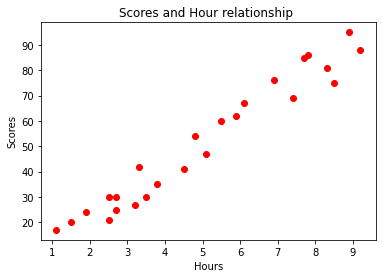

In [ ]:
#scatter graph to check relation between attributes

plt.scatter(x=data.Hours,y=data.Scores,c='red')
plt.xlabel("Hours")
plt.ylabel('Scores')
plt.title('Scores and Hour relationship ')

In [ ]:
# checking any missing values in dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

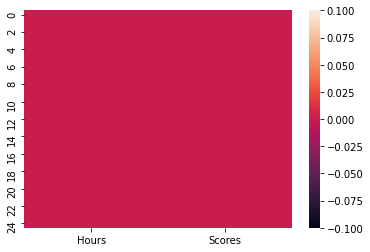

In [ ]:
# ploting heat graph 
import seaborn as sns
sns.heatmap(data.isnull())

# Splitting dataset into features and label 
####then splitting features and labels into training and validation set

In [ ]:
# splitting dataset into label and feature 
X = data.iloc[:,0].values
Y= data.iloc[:,1].values

In [ ]:
# from sklearn.model_selection import train_test_split
X_train , x_test , Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

# Building model to predict the values

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.reshape(-1,1),Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting values

In [ ]:
y_pred = model.predict(x_test.reshape(-1,1))
y_pred[:5]

array([17.14737849, 33.76624426, 74.8246185 , 26.92318188, 60.16091341])

In [ ]:
y_test[:5]

array([20, 27, 69, 30, 62])

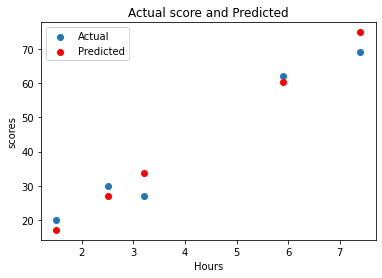

In [ ]:
plt.scatter(x_test, y_test,label='Actual')
plt.scatter(x_test,y_pred,c='red',label='Predicted')
plt.xlabel('Hours')
plt.ylabel('scores')
plt.title('Actual score and Predicted')
plt.legend()


model accuracy 

In [ ]:
model.score(x_test.reshape(-1,1), y_test)

0.9491748734859172

## calculating Root mean square Error 

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse} \n RMSE : {rmse}")

MSE: 20.138948129940175 
 RMSE : 4.487643939746131


# ** predicting study hours about 9.25 

If any student will study about 9.25 hours he will get nearly 92.90 Scores in exams

In [ ]:
# print(f'The marks will obtain by studying 9.25 hours : {model.predict([[9.25]])[0]}')
print(f" No. of study Hours : 9.25  \n",
      f"Marks will get : {model.predict([[9.25]])[0]}")

 No. of study Hours : 9.25  
 Marks will get : 92.9098547701573
